# Lab 8: Define and Solve an ML Problem of Your Choosing

In [72]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [73]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv('data/bookReviewsData.csv')

df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [74]:
df.columns.tolist()

['Review', 'Positive Review']

In [75]:
df.shape

(1973, 2)

## Part 2: Define Your ML Problem 

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set I have chosen is the Book Review data set: bookReviewsData.csv. Our goal is to predict whether the review is a positive review or not and the label is the 'Positive Review' column which features boolean values ('True' and 'False'). This will be a supervised learning problem since the model will be trained with labeled data. Specifically this is a binary classification problem because the model is predicting whether the outcome is 'True' or 'False'. We only have one feature and that is the 'Review' column. During the preprocessing phase I will extract one additional feature from the text: TF-IDF vectors. This is an important problem because identifying positive sentiment for book reviews can benefit companies in numerous ways. Companies will have the ability to identify and recognize loyal audiences/fanbases, invest in promoting highly reviewed books, and recommend books to readers based on their reading preferences. In short, a company can enhance their marketing strategy, increase their revenue, and strengthen customer engagement by making a model that predicts whether a review is positive or not.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Data Cleaning

In [76]:
# YOUR CODE HERE
# Do basic text data cleaning
df.describe(include='all')

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [77]:
#review is unstructured text, do basic data cleaning like get rid of white spaces, make chars lower case, etc.
#make string lowercase
df['Review'] = df['Review'].str.lower()

#remove extra white space
df['Review'] = df['Review'].str.strip() #gets rid of trailing white space

#gets rid of multiple spaces
df['Review'] = df['Review'].str.replace(r'\s+', ' ', regex=True) 

#Removes special chars
df['Review'] = df['Review'].str.replace(r'[^a-z\s]', '', regex=True)

In [78]:
#convert positive review into a binary flag
df['Positive Review'] = df['Positive Review'].astype(int)

### Inspecting Data Type

In [79]:
df.dtypes

Review             object
Positive Review     int64
dtype: object

### Check How many missing values are in the dataset

In [80]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

we have no missing values in our dataset!

### Check how balanced our dataset is 

In [81]:
#this column is pretty evenly split which means that its balanced.
df['Positive Review'].value_counts()

0    993
1    980
Name: Positive Review, dtype: int64

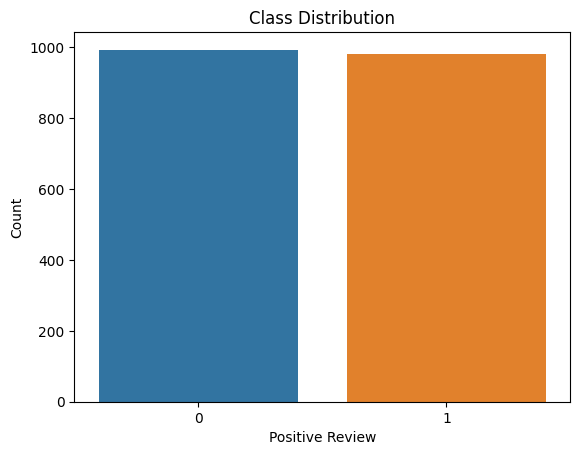

In [82]:
#Visualize the class balance
sns.countplot(data=df, x='Positive Review')
plt.title("Class Distribution")
plt.xlabel("Positive Review")
plt.ylabel("Count")
plt.show()

#### Model Selection
I'm considering using a basic classification model such as logistic regression and since this is also an NLP task I can perform feature engineering and scaling like TF-IDF. For this reason, I will use these methodologies in conjunction with one another to build an effective predictive model!

#### Evaluation Metrics
I will use accuracy, precision, recall, and F1-Score to evaluate model performance.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do not have a new feature list, I only have one feature and that is 'Review'. I decided to keep the 'Review' feature and not drop it because its the only feature in this dataset. The first data preparation technique I used to prepare my data for modeling was text data cleaning where I removed unnecessary white spaces, made my text characters lowercase, and removed special characters from the unstructured data text. I also converted the data type for the 'Positive Review' label from boolean values ('True' or 'False') to an integer data type which successfully turned the 'Positive Review' label into a binary flag. I then checked for null values in my dataset and saw that the books dataset has no null values. Lastly, I checked how balanced our dataset is and visually saw that our data is balanced and is ready for modeling! I chose my model to be a logistic regression classifier. My plan to train the model is to first make labeled examples. Afterwards, I will create the training and test data sets. I will then implement TF-IDF Vectorizer to transform the text. Following this, I will fit my model to the training data by training a logistic regression classifier and then analyze the logistic regression model's perfomance by using evaluation metrics such as loss and accuracy. Lastly, I will improve the model by performing model selection, specifically hyperparamter tuning C to find the best model for the logistic regression problem. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [83]:
#Necessary Libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries from Scikit-Learn for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Part 6: Carrying out your project plan 

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### The label is the 'Positive Review Column'

### Prepare the data for the model.

#### Create the Labeled Examples

In [84]:
X = df['Review'] #Feature
y = df['Positive Review'] #Label/target

#### Create Training & Test Data Sets

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

#### Implement TF-IDF Vectorizer to Transform the Text

In [86]:
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer = TfidfVectorizer()


# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)


# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#vocabulary size
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18704


### Fit your model to the training data and evaluate your model.

#### Train Logistic Regression Classifier

In [87]:
def train_test_LR(X_train_tfidf, y_train, X_test_tfidf, y_test, c=1):
    '''
    Fit a Logistic Regression classifier to the training data X_train, y_train.
    Return the loss, accuracy, f1, precision, and recall of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    
    # Step 1: Create Logistic Regression Model
    model = LogisticRegression(C=c)
    
    # Step 2: Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Step 3: Predict probabilities for log loss calculation
    predict_probability = model.predict_proba(X_test_tfidf)
    
    # Step 4: Predict class labels for accuracy calculation
    predict_class_labels = model.predict(X_test_tfidf)
    
    # Step 5: Calculate log loss, accuracy, F1-Score, and Precision/Recall
    loss = log_loss(y_test, predict_probability)
    accuracy = accuracy_score(y_test,predict_class_labels)
    f1 = f1_score(y_test, predict_class_labels)
    precision = precision_score(y_test, predict_class_labels)
    recall = recall_score(y_test, predict_class_labels)
    
    # Step 6: Return the two metrics
    return loss, accuracy, f1, precision, recall

### Evaluation Metrics

In [88]:
loss, accuracy, f1, precision, recall = train_test_LR(X_train_tfidf, y_train, X_test_tfidf, y_test)
print(loss) #log_loss
print(accuracy)
print(f1)
print(precision)
print(recall)

0.528111157346879
0.8205521472392638
0.821917808219178
0.8490566037735849
0.7964601769911505


### Improving the model's performance via performing model selection to find best model for the Logistic Regression problem.

#### Hyperparamter Tuning - Model Selection Technique

In [89]:
#Try different values of C
cs = [10**i for i in range(-5,6)]
cs

losses = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

for i in cs:
    loss, accuracy, f1, precision, recall = train_test_LR(X_train_tfidf, y_train, X_test_tfidf, y_test, c=i)
    losses.append(loss)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

    print(f'c={i},log loss={loss}, accuracy = {accuracy}, f1 = {f1}, precision = {precision}, recall = {recall}')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c=1e-05,log loss=0.6947565550683216, accuracy = 0.48006134969325154, f1 = 0.0, precision = 0.0, recall = 0.0
c=0.0001,log loss=0.6947174653087207, accuracy = 0.48006134969325154, f1 = 0.0, precision = 0.0, recall = 0.0


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c=0.001,log loss=0.6943276356151714, accuracy = 0.48006134969325154, f1 = 0.0, precision = 0.0, recall = 0.0
c=0.01,log loss=0.6905005872843457, accuracy = 0.48006134969325154, f1 = 0.0, precision = 0.0, recall = 0.0
c=0.1,log loss=0.6577859394920075, accuracy = 0.7561349693251533, f1 = 0.7114337568058077, precision = 0.9245283018867925, recall = 0.5781710914454278
c=1,log loss=0.528111157346879, accuracy = 0.8205521472392638, f1 = 0.821917808219178, precision = 0.8490566037735849, recall = 0.7964601769911505
c=10,log loss=0.39993525959614007, accuracy = 0.8312883435582822, f1 = 0.8367952522255193, precision = 0.8417910447761194, recall = 0.831858407079646
c=100,log loss=0.3774944274556882, accuracy = 0.8282208588957055, f1 = 0.8338278931750742, precision = 0.8388059701492537, recall = 0.8289085545722714
c=1000,log loss=0.4232338547654023, accuracy = 0.8266871165644172, f1 = 0.8315946348733234, precision = 0.8403614457831325, recall = 0.8230088495575221
c=10000,log loss=0.4274080291424

In [90]:
#visualize the results
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


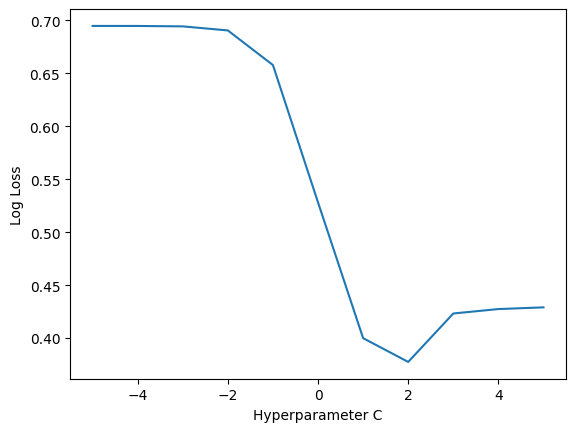

In [91]:
#plot log loss
sns.lineplot(x = cs_log10, y = losses)
plt.xlabel('Hyperparameter C')
plt.ylabel('Log Loss')
plt.show()

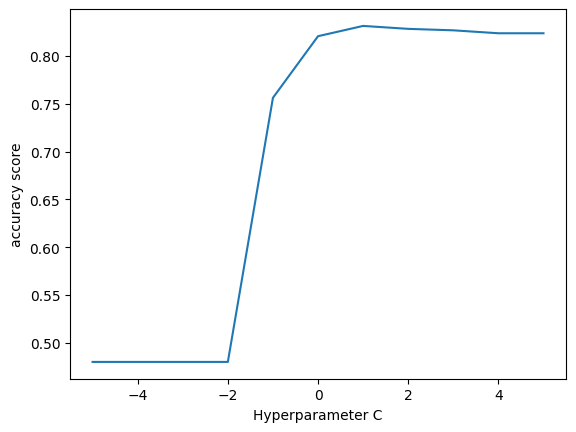

In [92]:
#plot accuracy
sns.lineplot(x = cs_log10, y = accuracies)
plt.xlabel('Hyperparameter C')
plt.ylabel('accuracy score')
plt.show()

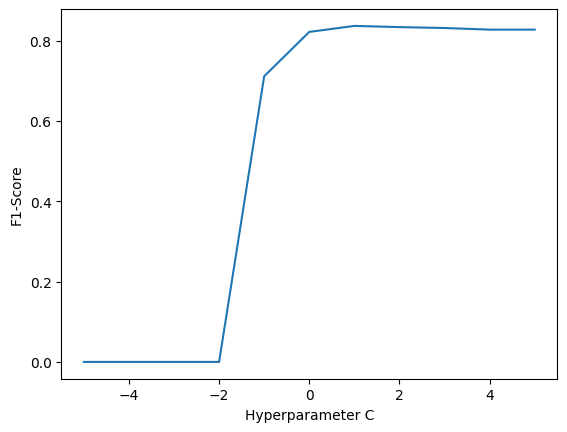

In [93]:
#Plot F1_Score
sns.lineplot(x = cs_log10, y = f1_scores)
plt.xlabel('Hyperparameter C')
plt.ylabel('F1-Score')
plt.show()

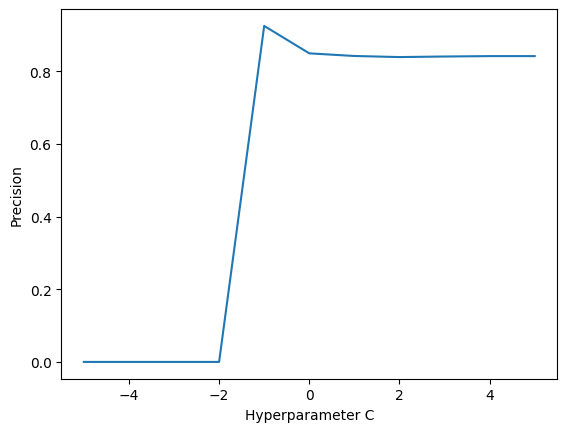

In [94]:
#Plot Precision
sns.lineplot(x = cs_log10, y = precisions)
plt.xlabel('Hyperparameter C')
plt.ylabel('Precision')
plt.show()

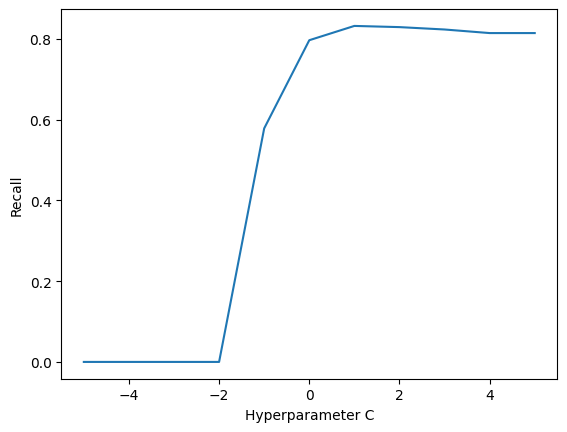

In [95]:
#Plot Recall
sns.lineplot(x = cs_log10, y = recalls)
plt.xlabel('Hyperparameter C')
plt.ylabel('Recall')
plt.show()

In [96]:
print(y.value_counts())


0    993
1    980
Name: Positive Review, dtype: int64


## Part 7: Analysis

The values of Hyperparameter C that yields the best results in terms of log loss are between 1.0 and 2.0. Between 2.0 and 4.0 the log loss is still considerably low compared to the Hyperparamter C values below 1.0. The value of hyperparamter C that yields the best results in terms of accuracy score is approxiametly between 0.0 and 1.0. Additionally the f1-score and the recall score are identical to the accuracy graph. There are several possibilities as to why this is the case, one of the possible explanations being that because our dataset is balanced the f1, accuracy, and recall score remain stable and identical to one another. For this reason the model has no need to adjust for class imbalances. Lastly, my final observation is that the Hyperparameter C with the best results for precision are between -1.0 and 0.0.